In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Loading dataset

In [2]:
path = '../Dataset'
images = []
labels = []
grain = None
foreign_particle = None
grain_broken = None
grain_covered = None
damaged_grain = None
for folder in os.listdir(path):
    if folder == '.DS_Store':
        continue
    folder_path = os.path.join(path, folder)
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (60, 60))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(folder)
        if folder == 'grain':
            grain = img
        elif folder == 'foreign_particles':
            foreign_particle = img
        elif folder == 'grain_broken':
            grain_broken = img
        elif folder == 'grain_covered':
            grain_covered = img
        else:
            damaged_grain = img

In [3]:
images = np.array(images)
labels = np.array(labels)
print('images shape: ', images.shape)
print('labels shape: ', labels.shape)

images shape:  (7139, 60, 60, 3)
labels shape:  (7139,)


## Visualising raw images

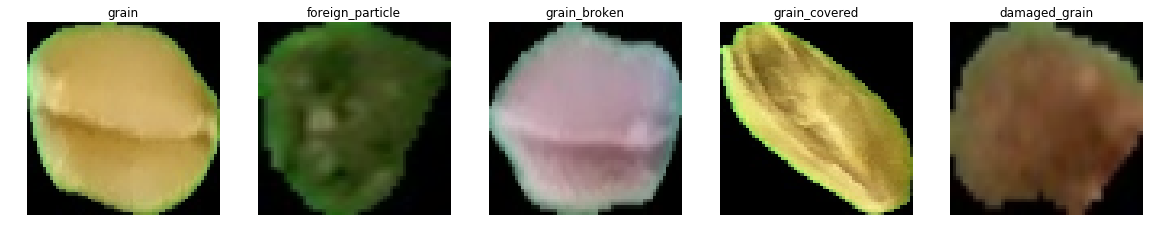

In [4]:
plt.figure(figsize = (20, 20))

plt.subplot(1, 5, 1)
plt.title('grain')
plt.axis('off')
plt.imshow(grain)

plt.subplot(1, 5, 2)
plt.title('foreign_particle')
plt.axis('off')
plt.imshow(foreign_particle)

plt.subplot(1, 5, 3)
plt.title('grain_broken')
plt.axis('off')
plt.imshow(grain_broken)

plt.subplot(1, 5, 4)
plt.title('grain_covered')
plt.axis('off')
plt.imshow(grain_covered)

plt.subplot(1, 5, 5)
plt.title('damaged_grain')
plt.axis('off')
plt.imshow(damaged_grain)

plt.show()

## Number of images per class

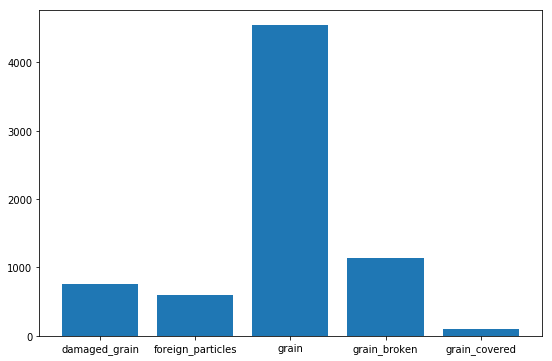

In [5]:
a = np.unique(labels, return_counts = True)
plt.figure(figsize = (9, 6))
plt.bar(a[0], a[1])
plt.show()

## Binning image intensity distribution

In [6]:
grain_gs = cv2.cvtColor(grain, cv2.COLOR_BGR2GRAY)
foreign_particle_gs = cv2.cvtColor(foreign_particle, cv2.COLOR_BGR2GRAY)
grain_broken_gs = cv2.cvtColor(grain_broken, cv2.COLOR_BGR2GRAY)
grain_covered_gs = cv2.cvtColor(grain_covered, cv2.COLOR_BGR2GRAY)
damaged_grain_gs = cv2.cvtColor(damaged_grain, cv2.COLOR_BGR2GRAY)

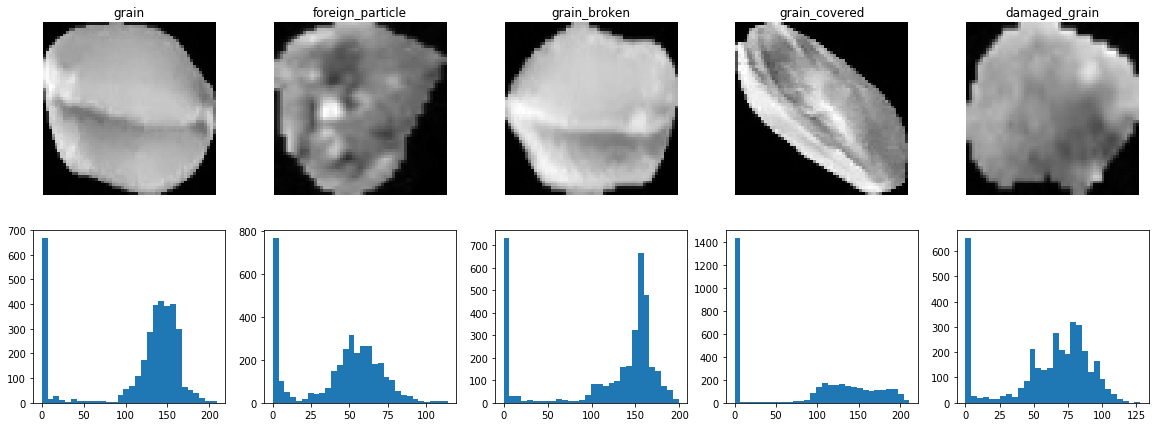

In [7]:
plt.figure(figsize = (20, 7))

plt.subplot(2, 5, 1)
plt.title('grain')
plt.axis('off')
plt.imshow(grain_gs, cmap = 'gray')
plt.subplot(2, 5, 6)
plt.hist(grain_gs.reshape(-1, ), bins = 30)

plt.subplot(2, 5, 2)
plt.title('foreign_particle')
plt.axis('off')
plt.imshow(foreign_particle_gs, cmap = 'gray')
plt.subplot(2, 5, 7)
plt.hist(foreign_particle_gs.reshape(-1, ), bins = 30)

plt.subplot(2, 5, 3)
plt.title('grain_broken')
plt.axis('off')
plt.imshow(grain_broken_gs, cmap = 'gray')
plt.subplot(2, 5, 8)
plt.hist(grain_broken_gs.reshape(-1, ), bins = 30)

plt.subplot(2, 5, 4)
plt.title('grain_covered')
plt.axis('off')
plt.imshow(grain_covered_gs, cmap = 'gray')
plt.subplot(2, 5, 9)
plt.hist(grain_covered_gs.reshape(-1, ), bins = 30)

plt.subplot(2, 5, 5)
plt.title('damaged_grain')
plt.axis('off')
plt.imshow(damaged_grain_gs, cmap = 'gray')
plt.subplot(2, 5, 10)
plt.hist(damaged_grain_gs.reshape(-1, ), bins = 30)
plt.show()

## Edge detection

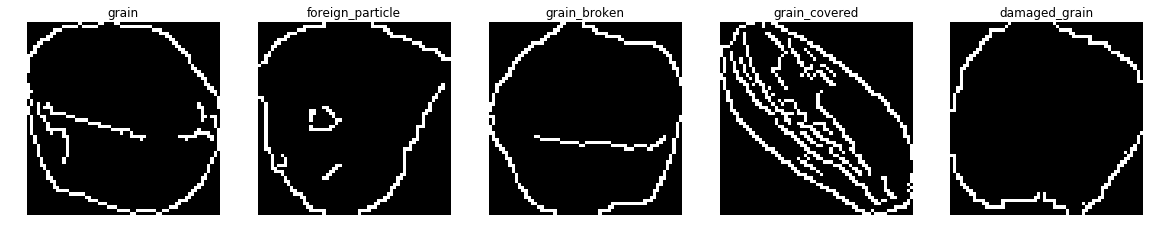

In [8]:
plt.figure(figsize = (20, 20))

grain_edges = cv2.Canny(grain_gs, 100, 200)
plt.subplot(1, 5, 1)
plt.title('grain')
plt.axis('off')
plt.imshow(grain_edges, cmap = 'gray')

foreign_particle_edges = cv2.Canny(foreign_particle_gs, 100, 200)
plt.subplot(1, 5, 2)
plt.title('foreign_particle')
plt.axis('off')
plt.imshow(foreign_particle_edges, cmap = 'gray')

grain_broken_edges = cv2.Canny(grain_broken_gs, 100, 200)
plt.subplot(1, 5, 3)
plt.title('grain_broken')
plt.axis('off')
plt.imshow(grain_broken_edges, cmap = 'gray')

grain_covered_edges = cv2.Canny(grain_covered_gs, 100, 200)
plt.subplot(1, 5, 4)
plt.title('grain_covered')
plt.axis('off')
plt.imshow(grain_covered_edges, cmap = 'gray')

damaged_grain_edges = cv2.Canny(damaged_grain_gs, 100, 200)
plt.subplot(1, 5, 5)
plt.title('damaged_grain')
plt.axis('off')
plt.imshow(damaged_grain_edges, cmap = 'gray')

plt.show()

## PCA

In [9]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(images.reshape(images.shape[0], -1))
print('X_pca shape: ', X_pca.shape)

X_pca shape:  (7139, 5)


In [10]:
print('Variance explained per principle component: ', pca.explained_variance_ratio_)

Variance explained per principle component:  [0.34229946 0.18765428 0.0526607  0.0451792  0.04090162]


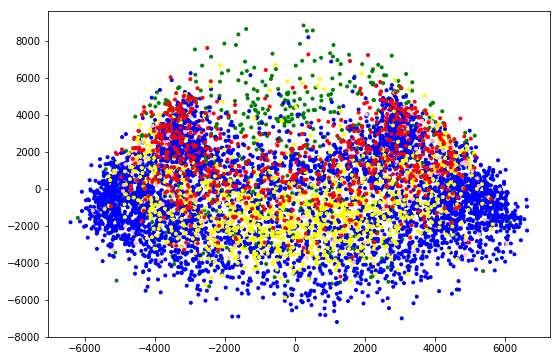

In [11]:
colors = np.copy(labels)
temp = np.unique(labels)
colors[colors == temp[0]] = 'red'
colors[colors == temp[1]] = 'green'
colors[colors == temp[2]] = 'blue'
colors[colors == temp[3]] = 'yellow'
colors[colors == temp[4]] = 'pink'
plt.figure(figsize = (9, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colors, marker = '.')
plt.show()

## t-SNE

In [12]:
tsne = TSNE()
X_tsne = tsne.fit_transform(images.reshape(images.shape[0], -1))
print('X_tsne shape: ', X_tsne.shape)

X_tsne shape:  (7139, 2)


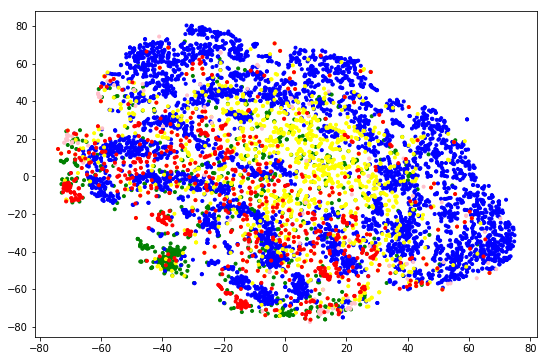

In [13]:
plt.figure(figsize = (9, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = colors, marker = '.')
plt.show()